In [70]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [49]:
#reading in the data
data=pd.read_csv('happiness_index.csv')

In [50]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [77]:
data.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [51]:
# droping unnecessary columns
data.drop(['Country or region','Overall rank'] ,inplace=True, axis=1)

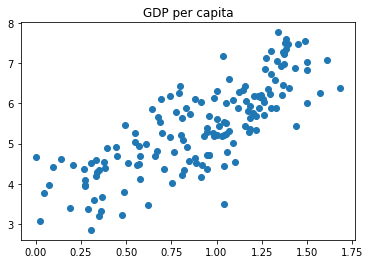

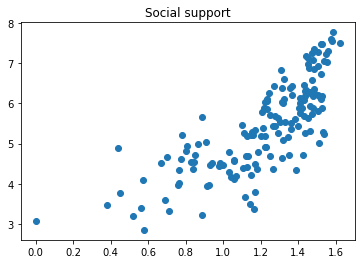

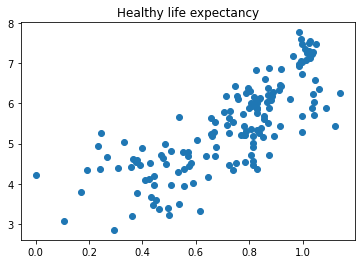

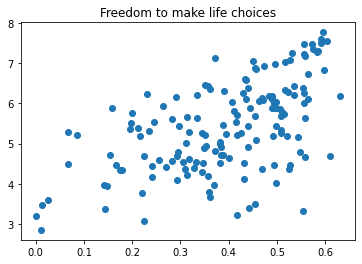

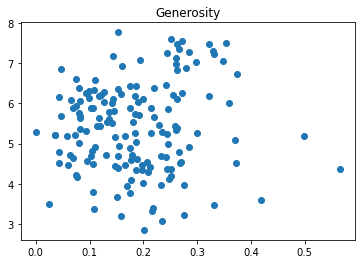

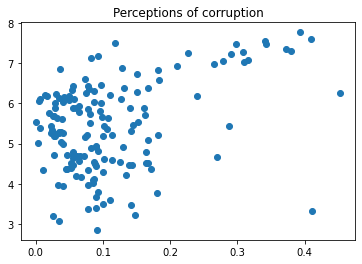

In [52]:
# ploting all columns to see corrolation to target
cols=[ 'GDP per capita',	'Social support',	'Healthy life expectancy',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption']
for col in cols:
    plt.scatter(data[col], data['Score'])
    plt.title(col)
    plt.show()

In [53]:
X=data.iloc[:,1:4]

In [54]:
y=data['Score']

In [55]:
# spiliting to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [56]:
# scaling the data
mms=MinMaxScaler()
X_train_scaled=mms.fit_transform(X_train)
X_test_scaled=mms.fit_transform(X_test)

In [57]:
# fitting the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)

In [58]:
predictions

array([5.17421122, 5.87548774, 6.00935538, 2.47950086, 6.06990123,
       6.8679414 , 6.240966  , 4.802889  , 4.93265741, 5.8739642 ,
       5.28089368, 6.42589498, 3.35835106, 5.36477679, 6.42470473,
       6.67907634, 6.21378418, 6.06725513, 6.4903921 , 5.03874899,
       3.52774156, 3.35093839, 5.21814421, 6.97182298])

In [59]:
lr.coef_

array([1.47714268, 2.07905418, 1.44064525])

In [60]:
lr.intercept_

2.159480403599628

In [61]:
lr.score(X_test_scaled, y_test)

0.5005952579045019

Text(0, 0.5, 'Residual')

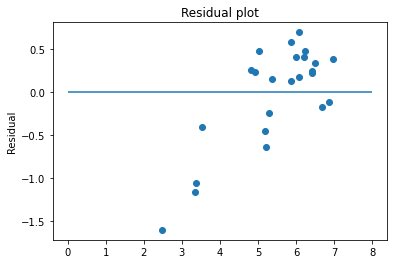

In [62]:
# ploting the residual
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin = 0, xmax = 8) 
plt.title('Residual plot')
plt.ylabel('Residual')

In [64]:
# bonus trying without droping column to see if the model improves
X=data.drop('Score', axis=1)
y=data['Score']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)
mms1=MinMaxScaler()
X_train_scaled=mms1.fit_transform(X_train)
X_test_scaled=mms1.fit_transform(X_test)

In [66]:
lr1 = LinearRegression()
lr1.fit(X_train_scaled, y_train)
predictions = lr1.predict(X_test_scaled)

In [68]:
lr1.score(X_test_scaled, y_test)

0.6316240639623687

Text(0, 0.5, 'Residual')

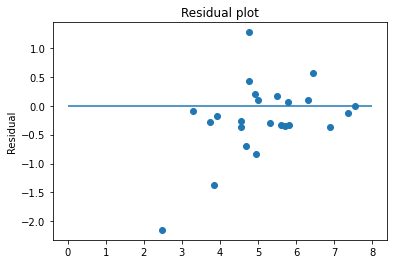

In [69]:
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin = 0, xmax = 8) 
plt.title('Residual plot')
plt.ylabel('Residual')

In [74]:

MSE = mean_squared_error(y_test, predictions)
MSE

0.4482547888939941

In [75]:
RMSE = mean_squared_error(y_test, predictions, squared = False)
RMSE

0.6695183260329728

In [76]:
MAE=mean_absolute_error(y_test, predictions)
MAE

0.4548519627464649

The RMSE tells us in numbers how off the score is in this case the score is off by around 0.7.
The MAE also gives us the actual value but it gives less weight to the big errors. 
The R Squared gives us the loss as a percentage.

 The y intercept number will be predicted only if all the features are 0. In this case the y intercept of the this regression line is probably meaningless because there isn't much chances that all the features for one country will be 0.